# TP Nº2: Introducción a Biopython

### Importamos librerias

In [2]:
pip install biopython

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 32.1 MB/s eta 0:00:00


In [3]:

## importamos librerías
import matplotlib.pyplot as plt
import re
import numpy as np

from Bio import SeqIO
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord
from Bio.SeqUtils import six_frame_translations
from Bio import Entrez
from Bio import ExPASy
from Bio import SwissProt

from collections import Counter
from PIL import Image
import random

# Proteinas aleatorias

## Código que genera secuencias de proteínas al azar, de un largo preestablecido por el usuario.

In [4]:
aminoacidos = ['A', 'R', 'N', 'D', 'C', 'Q', 'E', 'G', 'F', 'P', 'S', 'T', 'W', 'Y', 'V', 'L', 'I', 'M', 'H', 'K']
probabilidades = [1/len(aminoacidos) for aminoacido in aminoacidos]

def proteina_azar(largo):
  secuencia = ''
  aminoacidos = ['A', 'R', 'N', 'D', 'C', 'Q', 'E', 'G', 'F', 'P', 'S', 'T', 'W', 'Y', 'V', 'L', 'I', 'M', 'H', 'K']
  probabilidades = [1/len(aminoacidos) for aminoacido in aminoacidos]

  for i in range(largo):
          secuencia = secuencia + random.choices(aminoacidos,probabilidades)[0]
  return (secuencia)


print( proteina_azar(10))


QWDMQYDMQM


In [5]:
nucleotidos = ['A', 'C', 'G', 'T']
def adn_azar(largo):
  secuencia = ''
  nucleotidos = ['A', 'C', 'G', 'T']
  probabilidades = [0.25, 0.25, 0.25, 0.25]
  for i in range(largo):
          secuencia = secuencia + random.choices(nucleotidos,probabilidades)[0]
  return (secuencia)

print(adn_azar(12))

AGCGCGTTCTAC


## Frecuencias en Secuencias


### Determinamos la frecuencia de cada uno de los 20 aminoácidos para un set de secuencias de proteínas y para una secuencia de ADN, ambas al azar, a partir de los codones correspondientes.

In [6]:
def es_proteina(secuencia):
  secuencia = str(secuencia)
  return bool(re.search(r'[^ACGT]', secuencia))

# Le ingresa  una secuencia, si no es ADN lo codifica
def frecuencia(seq):
  # Convertir a Seq si no lo es
  if not isinstance(seq, Seq):
      seq = Seq(seq)

  # Me fijo si es proteina o ADN, poniendo como parametro si la cadena contiene letras distintas a ACGT
  if es_proteina(seq) == True:
    # Contar las ocurrencias de cada letra en la secuencia
    contador = Counter(seq)

    # Total de letras en la secuencia
    total_letras = len(seq)

    # Calcular la probabilidad de cada letra
    probabilidades = {letra: contador[letra] / total_letras for letra in contador}
  else:
    # Traduzco la secuencia a aminoacidos
    seq_proteina = seq.translate()
    return frecuencia(seq_proteina)

  return probabilidades

# Revisamos resultados para una secuencia generada al azar

secuencia_adn = adn_azar(1200)
# Llamada a la función para obtener las probabilidades
probabilidades_al_azar_adn = frecuencia(secuencia_adn)
# Imprimir el diccionario con las probabilidadesscipy.stats.chisquare
print(probabilidades_al_azar_adn)

#Lo mismo para secuencia de aminoacidos
secuencia_proteina = proteina_azar(400)
probabilidades_al_azar_proteina = frecuencia(secuencia_proteina)
print(probabilidades_al_azar_proteina)

{'V': 0.07, 'R': 0.0875, 'G': 0.0725, 'S': 0.1025, 'K': 0.0275, 'L': 0.1225, 'E': 0.0225, 'I': 0.0375, 'Q': 0.025, 'T': 0.06, 'A': 0.0575, '*': 0.03, 'N': 0.05, 'H': 0.025, 'F': 0.0325, 'Y': 0.0325, 'M': 0.01, 'D': 0.04, 'P': 0.0575, 'C': 0.03, 'W': 0.0075}
{'H': 0.0725, 'M': 0.04, 'W': 0.06, 'E': 0.05, 'P': 0.0575, 'F': 0.045, 'Y': 0.05, 'C': 0.0525, 'N': 0.0525, 'Q': 0.0725, 'R': 0.0475, 'V': 0.04, 'D': 0.04, 'S': 0.0275, 'L': 0.05, 'A': 0.0625, 'G': 0.045, 'T': 0.055, 'K': 0.0425, 'I': 0.0375}



 ### Mostramos los resultados del inciso anterior en un gráfico de barras.

<Figure size 640x480 with 0 Axes>

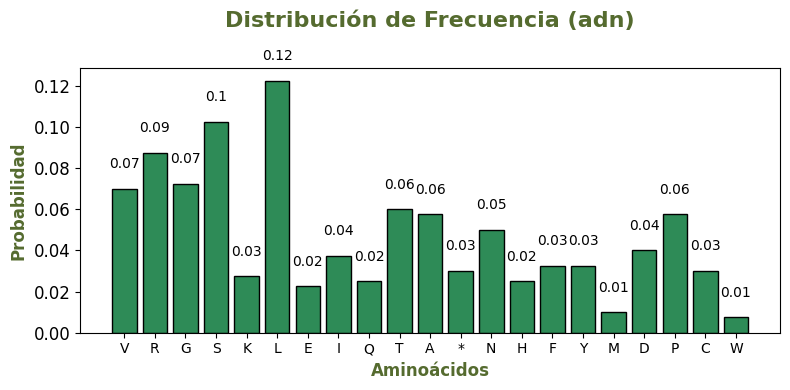

<Figure size 640x480 with 0 Axes>

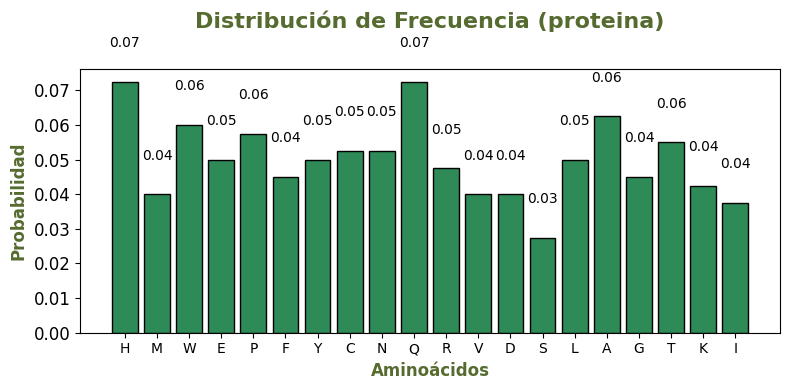

In [7]:
def graficar_frecuencia(diccionario, origen):
    # Letras (o aminoácidos)
    letras = list(diccionario.keys())
    # Valores de probabilidad
    probabilidades_valores = list(diccionario.values())

    # Crear el gráfico
    plt.figure(figsize=(8, 4))  # Ajustamos el tamaño de la figura
    bars = plt.bar(letras, probabilidades_valores, color='seagreen', edgecolor='black')

    # Título dinámico según el origen
    if origen:
        titulo = f'Distribución de Frecuencia ({origen})'
    else:
        titulo = 'Distribución de Frecuencia'

    # Añadir etiquetas y título con un estilo más atractivo
    plt.xlabel('Aminoácidos', fontsize=12, fontweight='bold', color='darkolivegreen')
    plt.ylabel('Probabilidad', fontsize=12, fontweight='bold', color='darkolivegreen')
    plt.title(titulo, fontsize=16, fontweight='bold',color='darkolivegreen', pad=30)
    plt.yticks(fontsize=12, color='black')

    # Agregar valores encima de las barras para mayor claridadscipy.stats.chisquare
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.01, round(yval, 2), ha='center', fontsize=10, color='black')

    # Mejorar la presentación del gráfico
    plt.tight_layout()  # Ajusta automáticamente el espaciado

plt.figure()
graficar_frecuencia(probabilidades_al_azar_adn, "adn")
plt.show()
plt.close()

plt.figure()
graficar_frecuencia(probabilidades_al_azar_proteina, "proteina")
plt.show()
plt.close()

#Traducir y obtener ORF
Traducimos la secuencia por cada uno de los seis marcos de lectura(obteniendo una secuencia proteica por cada uno) y obtenemos la distribución de los
largos de los Marcos Abiertos de Lectura (ORF de Open Reading Frames).

In [8]:
#Definimos una funcion para obtener todos los marcos de lectura y medir los largos de los ORFs.
def obtener_marcos_abiertos_lectura(secuencia_adn):
  #Hay 6 marcos de lectura. Primero traducimos los 3 posibles de la secuencia input, adelantando 0,1 o 2
  #aminoacidos el comienzo de la lectura
      secuencia_c = secuencia_adn.reverse_complement()
      marco_1 = secuencia_adn.translate()
      marco_2 = secuencia_adn[1:].translate()
      marco_3 = secuencia_adn[2:].translate()
     #Hacemos lo mismo para la reversa complementaria
      marco_4 = secuencia_c.translate()
      marco_5 = secuencia_c[1:].translate()
      marco_6 = secuencia_c[2:].translate()
      #Lista con las 6 posibles traducciones
      marcos = [marco_1,marco_2,marco_3,marco_4, marco_5, marco_6]

      largos_ORF = []
      ORFS = []
      #Para cada marco me quedo con las secuencias entre codones stopscipy.stats.chisquare
      for marco in marcos: #Para cada marco
          largos_ORF_ = []
          ORFS_ = []
          lista_posibles_ORFs = marco.split("*") #Nos quedamos con las subsecuencias entre codones stop
          for posible_seq in lista_posibles_ORFs: #Para cada dicha subsecuencia     "                "
              if (len(posible_seq )>0): #No este vacia
                      largos_ORF_.append(len(posible_seq)) #Agregamos su largo a la lista de los largos de los ORF de ese marco
                      ORFS_.append(posible_seq) #Agregamos la secuencia de aminoacidos en si a la lista de secuencias de ORF de ese marco
          largos_ORF.append(largos_ORF_) #Agregamos ambas listas a una respectiva lista general, que tendra una lista (con los largos de los ORFs o los ORFs) por cada marco
          ORFS.append(ORFS_)
      return ORFS, largos_ORF

#Un ejemplo de output para una secuencia al azar
secuencia_azar = Seq(adn_azar(60000))
ORFs_a, largos_ORF_a = obtener_marcos_abiertos_lectura(secuencia_azar)
for i in range(len(largos_ORF_a)):
      print(f"Para el marco {i} hay {len(largos_ORF_a[i])} ORFs de largo promedio {np.average(largos_ORF_a[i]):.2f}")


Para el marco 0 hay 899 ORFs de largo promedio 21.21
Para el marco 1 hay 917 ORFs de largo promedio 20.76
Para el marco 2 hay 903 ORFs de largo promedio 21.10
Para el marco 3 hay 873 ORFs de largo promedio 21.87
Para el marco 4 hay 879 ORFs de largo promedio 21.70
Para el marco 5 hay 923 ORFs de largo promedio 20.61


/usr/local/lib/python3.12/dist-packages/Bio/Seq.py:2879: BiopythonWarning: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.
  warnings.warn(


# Definimos y llamamos una funcion que obtiene secuencias  de adn o proteina dados sus ids y la base de datos donde hacer la busqueda.


In [9]:
def obtener_secuencias(lista, bd):
  # Armo el diccionario de salida
  secuencias = []

  # Configura tu correo electrónico (recomendado por NCBI para acceder a su API)
  Entrez.email = "solernadina@gmail.com"

  for i in range(len(lista)):
    try:
      # Realizar una búsqueda en la base de datos de proteínas de NCBI
      handle = Entrez.efetch(db=bd, id= lista[i], rettype="gb", retmode="text")

      # Leer la respuesta y convertirla en un objeto Secuencia (Bio.SeqRecord)
      record = SeqIO.read(handle, "genbank")

      secuencias.append(record.seq)

      # Cerrar el archivo de respuesta
      handle.close()
    except Exception as e:
            # Si ocurre un error (como un identificador inválido), que no haga nada
            pass

  return secuencias


# 4 Comparacion de distribuciones

## 4 a) Compare Distribución de aminoácidos de secuencia de proteínas al azar vs. secuencias de proteínas reales.

Obtenemos la secuencia real

In [10]:
# Obtenemos la secuencia de proteina real

Entrez.email = "solernadina@gmail.com"  # Tu correo (importante para NCBI)
# Descargar desde la base de datos de proteínas
handle = Entrez.efetch(db="protein", id="AWJ68149.1", rettype="gb", retmode="text")
record = SeqIO.read(handle, "genbank")
handle.close()

proteina_real = record.seq


Generamos una secuencia de proteina al azar con el mismo largo que la secuencia obtenida

In [11]:
# Obtenemos la secuencia de proteina al azar
proteina_autogenerada = proteina_azar(len(proteina_real))

Realizamos ambos graficos de distribucion

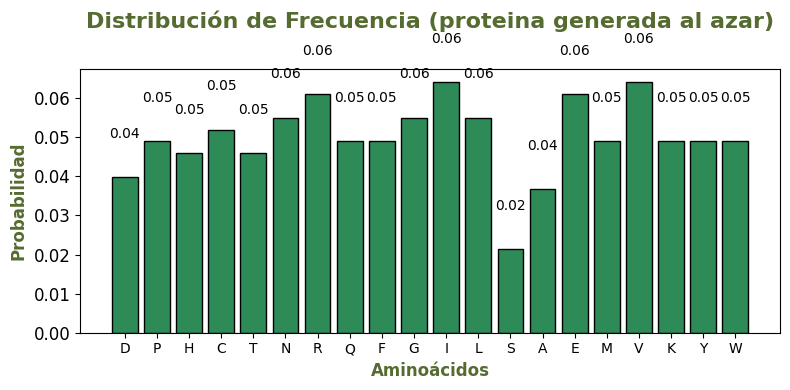

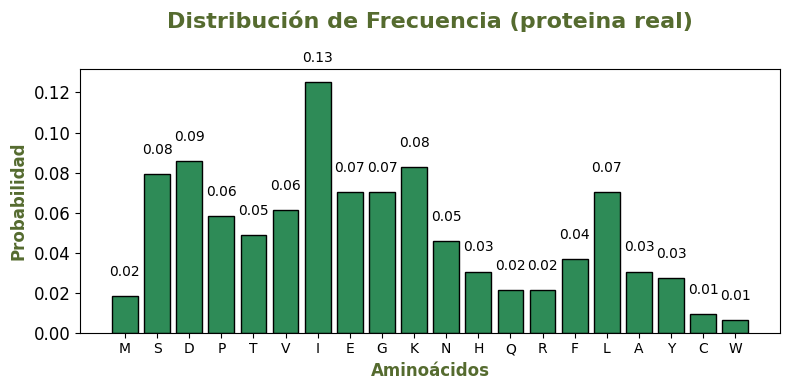

In [12]:
# Llamada a la función para obtener las probabilidades
probabilidades_proteina_autogenerada = frecuencia(proteina_autogenerada)
probabilidades_proteina_real = frecuencia(proteina_real)

len(proteina_autogenerada)
graficar_frecuencia(probabilidades_proteina_autogenerada, "proteina generada al azar")
graficar_frecuencia(probabilidades_proteina_real, "proteina real")

Realicemos una frecuencia superpuesta para poder ver claras las diferencias

In [13]:
def graficar_frecuencias_superpuestas(dic1, dic2, label1="Distribución 1", label2="Distribución 2", titulo="Distribución Comparada"):
    # Asegurarse de tener las mismas claves en el mismo orden
    letras = sorted(set(dic1.keys()) | set(dic2.keys()))

    val1 = [dic1.get(letra, 0) for letra in letras]
    val2 = [dic2.get(letra, 0) for letra in letras]

    x = np.arange(len(letras))
    bar_width = 0.4

    plt.figure(figsize=(10, 5))
    plt.bar(x, val1, width=bar_width, color='royalblue', label=label1, alpha=0.7)
    plt.bar(x, val2, width=bar_width, color='orangered', label=label2, alpha=0.5)

    plt.xticks(x, letras)
    plt.xlabel("Aminoácidos", fontsize=12, fontweight='bold')
    plt.ylabel("Probabilidad", fontsize=12, fontweight='bold')
    plt.title(titulo, fontsize=14, fontweight='bold')
    plt.legend()
    plt.tight_layout()
    plt.show()



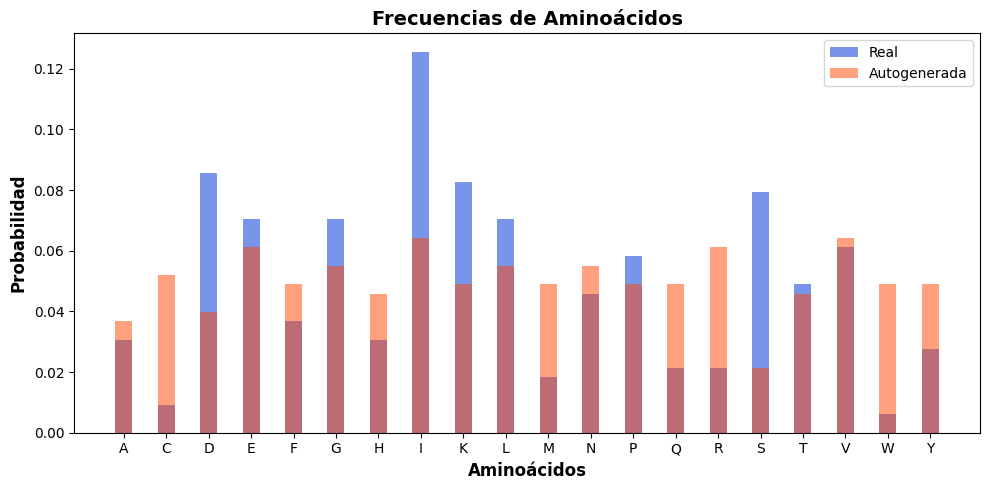

In [14]:
graficar_frecuencias_superpuestas(probabilidades_proteina_real, probabilidades_proteina_autogenerada, label1="Real", label2="Autogenerada", titulo="Frecuencias de Aminoácidos")


### Conclusiones de estos graficos
Vemos en primera instancia que la distribucion en proteinas reales no es uniforme, teniendo ciertos aminoacidos mayor frecuencia. Esto permite identificar aminoacidos clave (por ejemplo, leucina, alanina, glicina, serina, etc.), y aminoacidos raros o de menor frecuencia, como triptofano (W) o cisteína (C).

En cuanto a la secuencia autogenerada, muestra frecuencias más uniformes, lo que refleja la falta de restricciones biológicas o funcionales.

Esto refuerza la idea de que las proteínas no son cadenas al azar de aminoácidos, sino que tienen una composición cuidadosamente seleccionada para cumplir funciones específicas.

# 4 b) Analice cómo cambian las distribuciones al aumentar el tamaño de la secuencia “al azar” analizada, y al incrementar el número de secuencias reales analizadas. ¿Cuándo es suficiente?

##Vamos a analizar como cambian las distribuciones de aminoacidos tanto para proteinas reales como para proteinas reales variando los largos
###Trabajaremos con la familia de globinas humanas

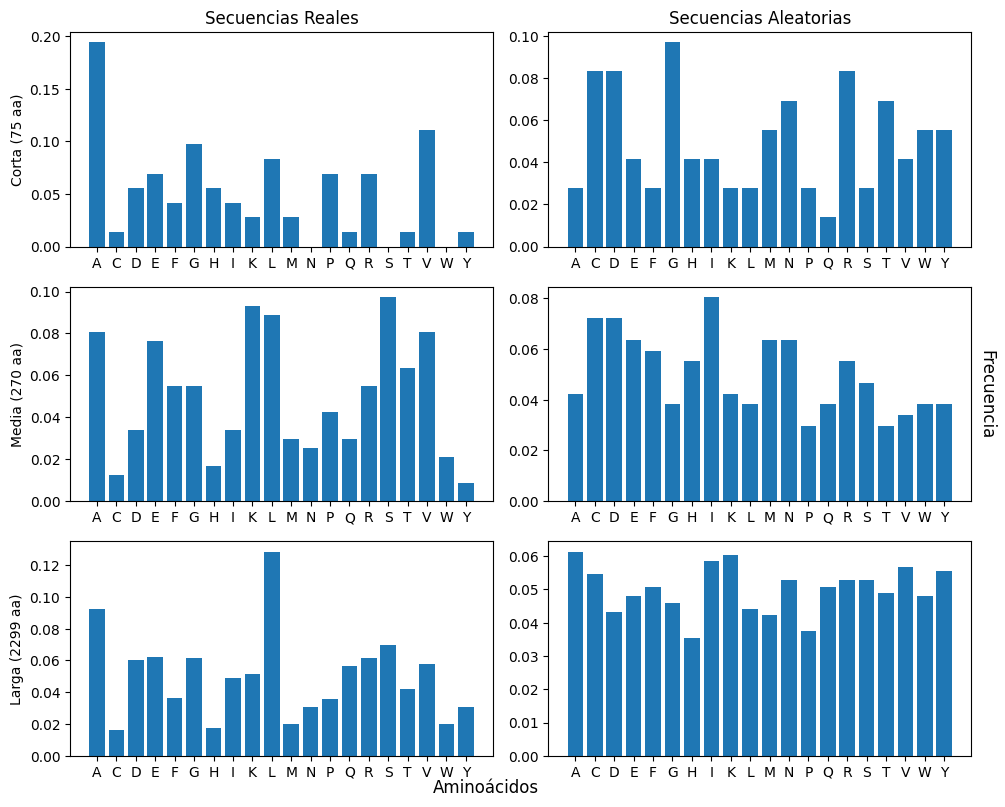

In [15]:
import matplotlib.pyplot as plt
import numpy as np

fasta_path = "globin_full_sequences (2).fasta"

# Leer secuencias
globinas = []
for record in SeqIO.parse(fasta_path, "fasta"):
    globinas.append(str(record.seq))

globinas = list(set(globinas))

for glob in globinas:
    if len(glob) <80:
        globina_corta = glob
    elif 200 < len(glob) and len(glob) < 300:
        globina_media = glob
    elif 700 < len(glob):
        globina_larga = glob

prot_azar_corta = proteina_azar(len(globina_corta))
prot_azar_media = proteina_azar(len(globina_media))
prot_azar_larga = proteina_azar(len(globina_larga))

def frecuencias_ordenadas(proteina):
    contador  = dict(Counter(proteina)) #Contamos Aparciciones de Aminoacidos
    probabilidades = {letra: contador[letra] / len(proteina) for letra in list(contador.keys())} #Convertimos en frecuencias

    for aa in list(probabilidades.keys()):  # Eliminamos aminoacidos invalidos
      if aa not in aminoacidos:
         probabilidades.pop(aa)

    for aa in aminoacidos:     # Agregamos aminoacidos ausentes en la proteina
      if aa not in probabilidades.keys():
        probabilidades[aa] = 0

    prob_ordenadas = sorted(probabilidades.items())
    frecuencias = [aa[1] for aa in prob_ordenadas]

    return frecuencias

fr_corta_real = frecuencias_ordenadas(globina_corta)
fr_media_real = frecuencias_ordenadas(globina_media)
fr_larga_real = frecuencias_ordenadas(globina_larga)

fr_corta_azar = frecuencias_ordenadas(prot_azar_corta)
fr_media_azar = frecuencias_ordenadas(prot_azar_media)
fr_larga_azar = frecuencias_ordenadas(prot_azar_larga)

# Crear figura y ejes
fig, axs = plt.subplots(3, 2, figsize=(10, 8))  # 3 filas, 2 columnas
aa_ordenados = sorted(aminoacidos)

# Graficar en el primer subplot
axs[0,0].bar(aa_ordenados, fr_corta_real)
axs[1,0].bar(aa_ordenados, fr_media_real)
axs[2,0].bar(aa_ordenados, fr_larga_real)

axs[0,1].bar(aa_ordenados, fr_corta_azar)
axs[1,1].bar(aa_ordenados, fr_media_azar)
axs[2,1].bar(aa_ordenados, fr_larga_azar)

axs[0,0].set_title("Secuencias Reales")
axs[0,1].set_title("Secuencias Aleatorias")

axs[0,0].set_ylabel("Corta (75 aa)")
axs[1,0].set_ylabel("Media (270 aa)")
axs[2,0].set_ylabel("Larga (2299 aa)")

fig.text(0.5, 0.002, 'Aminoácidos', ha='center', fontsize=12)   # Eje X
fig.text(1, 0.5, 'Frecuencia', va='center', ha='center',rotation= 270, fontsize=12)  # Eje Y

plt.tight_layout()
plt.show()


# 4C y 4D) Elija una métrica que permita comparar dos distribuciones. (p.ej., RMSE). Escriba un código que dadas dos distribuciones las compare y obtenga la métrica correspondiente.

Elegimos el test de chi cuadrado para comparar distribuciones.
Para mostrar como funciona:
- Primero tomamos como distribucion real de aminoacidos a la obtenida en nuestro archivo de globinas.
- Luego realizamos el test de chi cuadrado o medimos el error cuadratico medio: por un lado un conjunto de secuencias aleatorias de aminoacidos y por el otro un subconjunto de las globinas; ambas respecto la distribucion de referencia.
- Finalmente marcamos un umbral que permita separar las reales de las aleatorias.

### Codigo que compara dos distribuciones, calculando el ECM o el p valor del test chi cuadrado

In [39]:
def metrica(dist_a, dist_b, metrica: str):
  assert metrica in ["ECM", "CHI"],  "Metrica no valida"

  if metrica == "ECM":
    dist_a = np.array(dist_a)
    dist_b = np.array(dist_b)
    resultado = np.mean((dist_a - dist_b) **2)
    #Normalizamos para que quede entre 0 y 1. Lo maximo que puede ser es 2/20, es decir, cuando ambas tienen probabilidad 1 en aminoacidos distintos
    resultado = (20/2) * resultado
  elif metrica == "CHI":
    resultado = chisquare( f_obs = dist_a, f_exp= dist_b )
    resultado = resultado.pvalue

  return resultado


## Test de Chi Cuadrado

In [17]:
random.seed(3)
from collections import Counter
from scipy.stats import chisquare

def ajustar_dist(dist):
    return  [dist[i] + (1-sum(dist))/20 for i in range(20)]

#Obtenemos la distribucion de referencia de las globinas
distribucion_globinas = [0] * 20
for globina in globinas:
    fr_globina = frecuencias_ordenadas(globina)
    distribucion_globinas = [distribucion_globinas[i] + fr_globina[i] for i in range(20)]
distribucion_globinas = [aa/len(globinas) for aa in distribucion_globinas]
distribucion_globinas = np.array(distribucion_globinas)
distribucion_globinas = ajustar_dist(distribucion_globinas)


chi_cuadrado_reales = []
chi_cuadrado_azar = []

for glob in globinas:
  #Test para las Globinas (secuencias reales)
        obs_real = np.array(frecuencias_ordenadas(glob))
        obs_real = ajustar_dist(obs_real)

        chi_real = metrica(obs_real, distribucion_globinas,"CHI")
        chi_cuadrado_reales.append(chi_real)

 #Test para secuencias aleatorias (mismo largo que la Globina)
        prot_azar = proteina_azar( len(glob))
        obs_azar = np.array(frecuencias_ordenadas(prot_azar))
        obs_azar = ajustar_dist(obs_azar)

        chi_azar = metrica(obs_azar, distribucion_globinas,"CHI")
        chi_cuadrado_azar.append(chi_azar)


### P valores resultantes del test chi cuadrado

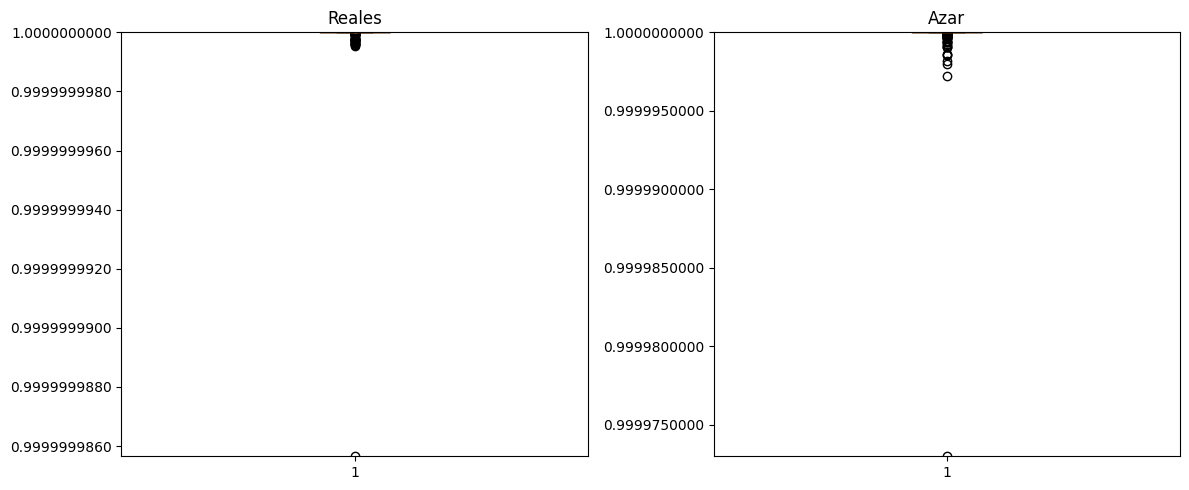

In [18]:
import matplotlib.ticker as ticker

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Boxplot Reales
axes[0].boxplot(chi_cuadrado_reales)
axes[0].set_title("Reales")
axes[0].set_ylim(min(chi_cuadrado_reales), max(chi_cuadrado_reales))
axes[0].set_title("Reales")
axes[0].yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f"{x:.10f}"))


# Boxplot Aleatorias
axes[1].boxplot(chi_cuadrado_azar)
axes[1].set_title("Azar")
axes[1].set_ylim(min(chi_cuadrado_azar), max(chi_cuadrado_azar))
axes[1].yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f"{x:.10f}"))


plt.tight_layout()
plt.show()

## Metrica de Error Cuadratico Medio

In [41]:
ECM_reales = []
ECM_azar = []

for glob in globinas:
  #ECM de la Globina (Real)
        obs_real = np.array(frecuencias_ordenadas(glob))
        obs_real = ajustar_dist(obs_real)

        ECM_real = metrica(obs_real, distribucion_globinas, "ECM")
        ECM_reales.append(ECM_real)

  #ECM de la secuencia aleatoria (mismo largo que la Globina)
        prot_azar = proteina_azar( len(glob))
        obs_azar = np.array(frecuencias_ordenadas(prot_azar))
        obs_azar = ajustar_dist(obs_azar)

        ECM_aleatorio = metrica(obs_azar, distribucion_globinas, "ECM")
        ECM_azar.append(ECM_aleatorio)




## ECM resultantes

In [73]:
bins = np.linspace(0, 0.0127, 20)  # 10 bins
bins = list(bins)
bins.append( max( max(ECM_reales), max(ECM_azar)))

ticks = np.round(bins,5)
ticks[-1] = ticks[-2] + (ticks[-2] - ticks[-3])
ticks_labels = np.round(bins,5)
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Primer histograma (Reales)
axes[0].hist(ECM_reales, bins=bins, color="skyblue", edgecolor="black")
axes[0].set_title("Reales")
axes[0].set_xlabel("ECM")
axes[0].set_ylabel("Frecuencia")
axes[0].set_xticks(ticks)
axes[0].set_xticklabels(ticks_labels, rotation = 45)
axes[0].set_xlim(0,ticks[-1])

# Segundo histograma (Azar)
axes[1].hist(ECM_azar, bins=bins, color="salmon", edgecolor="black")
axes[1].set_title("Azar")
axes[1].set_xlabel("ECM")
axes[1].set_ylabel("Frecuencia")
axes[1].set_xticks(ticks)
axes[1].set_xticklabels(ticks_labels, rotation = 45)
axes[1].set_xlim(0,ticks[-1])

plt.tight_layout()
plt.show()

print(f"Con el umbral 0,00668")
print(sum([1  for a in ECM_reales if a < 0.00668])/ len(ECM_reales))
print(sum([1  for a in ECM_azar if a > 0.00668])/ len(ECM_azar))

#for umbral in ticks:
 #   print(f"Con el umbral {umbral}")
  #  print(sum([1  for a in ECM_reales if a < umbral])/ len(ECM_reales))
   # print(sum([1  for a in ECM_azar if a > umbral])/ len(ECM_azar))
    #print()

Con el umbral 0,00668
0.8977076192572561
0.690229866985315


i) ver como evoluciona las distribuciones obtenidas en 4A al aumentar el tamaño de la
muestra (Evaluar cuando la distribución deja de cambiar).

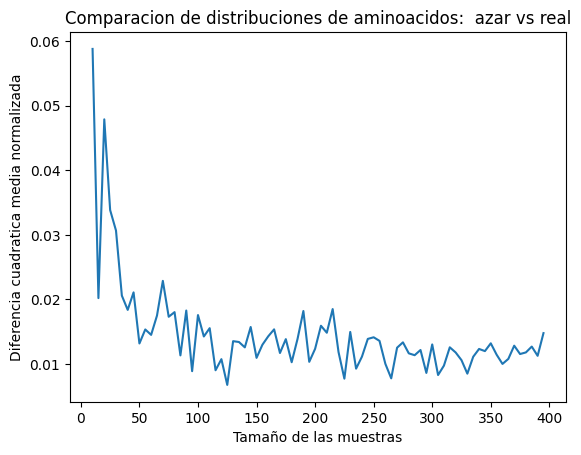

In [98]:
#Iteramos sobre el tamaño de la muestras comparando distribuciones al azar vs la distribucion de referencia de globinas
random.seed(3)

tamanios_muestras = np.arange(10,400,5)
ecm = []
for tamanio in tamanios_muestras:
  prot_azar= proteina_azar(tamanio)
  fr_azar = frecuencias_ordenadas(prot_azar)
  fr_azar = ajustar_dist(fr_azar)

  prot_real = random.choices(distribucion_globinas, k= tamanio)
  fr_real = frecuencias_ordenadas(proteina_real)
  fr_real = ajustar_dist(fr_real)
  ecm.append(metrica(fr_real, fr_azar, "ECM") )

plt.plot(tamanios_muestras, ecm)
plt.xlabel("Tamaño de las muestras")
plt.title("Comparacion de distribuciones de aminoacidos:  azar vs real")
plt.ylabel("Diferencia cuadratica media normalizada")
plt.show()

Podemos observar como las distribuciones de aminoacidos varian en mucha menor medida a partir de muestras de tamaño 100 aproximadamente, y el error se mantiene entre 0.01 y 0.02

ii) estudiar de manera sistemática las diferencias entre las distribuciones obtenidas en 4a
para diferentes muestras (comparar distribuciones de secuencias naturales y al azar).

175
10392
5844
1497
568
564
529
592
4077


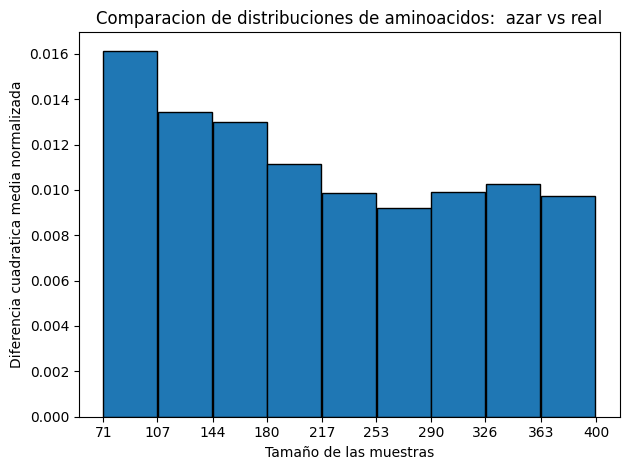

In [200]:
globinas = sorted(globinas, key = len)
indices_muestras = list(range(0,len(globinas), 200))
indices_muestras = [int(a) for a in indices_muestras]
tamanios_muestras = [len(globinas[indice]) for indice in indices_muestras]




indices = np.arange(0,len(globinas))
tamanios_muestras = [len(globina) for globina in globinas]

resultados = []
for indice in indices:
  proteina_real = globinas[indice]
  fr_real = np.array(frecuencias_ordenadas(proteina_real))
  fr_real = ajustar_dist(fr_real)

  prot_azar = proteina_azar( len(proteina_real))
  fr_azar = np.array(frecuencias_ordenadas(prot_azar))
  fr_azar = ajustar_dist(fr_azar)

  ECM = metrica(fr_azar, fr_real, "ECM")
  resultados.append(ECM)

bins = np.linspace(min(tamanios_muestras), 400, 10)
bins = list(bins)
bins = [int(a) for a in bins]

grupos = [[] for _ in range(len(bins) - 1)]

# Recorremos A con índices
for i, longitud in enumerate(tamanios_muestras):
    for j in range(len(bins) - 1):
        if bins[j] <= longitud < bins[j+1]:
            grupos[j].append(i)
            break

ecm_promedios = []
for g in grupos:
    print(len(g))
    ecm_promedios.append( np.mean([resultados[indice] for indice in g ]))

centro_bins = [(bins[i] + bins[i+1])/2 for i in range(len(bins)-1)]

plt.bar(centro_bins, ecm_promedios, width = 36, edgecolor = 'black')

plt.xlabel("Tamaño de las muestras")
plt.title("Comparacion de distribuciones de aminoacidos:  azar vs real")
plt.ylabel("Diferencia cuadratica media normalizada")
plt.xticks(bins)
#plt.xlim(min(tamanios_muestras),500)
plt.tight_layout()
plt.show()


Podemos concluir del grafico de barras anterior que la diferencia de distribuciones entre proteinas reales y al azar disminuye a medida que aumenta el tamaño de la muestra, aunque no es una diferencia tan significativa.

Asi es como el error cuadratico medio de los ultimos rangos del histograma (que son mas largas) no supera el 0.01; mientras que el primer rango alcanza el valor de 0.016.

# 4 E)Detector de ORFs.

## i) levante una secuencia de ADN

In [214]:
handle = Entrez.efetch(db='nucleotide', id="MT497167", rettype="gb", retmode="text")
secuencia_adn = SeqIO.read(handle, "genbank")
secuencia_adn = secuencia_adn.seq

print(f"La secuencia de ADN levantada tiene {len(record)} bases")

La secuencia de ADN levantada tiene 560 bases


## ii) Obtenga los 6 marcos de lectura posibles y determine los ORFs de cada uno de ellos. (3 marcos de lectura para la secuencia de ADN y su secuencia reversa complementaria) (ORFs....region entre un codon de comienzo y de fin)

In [218]:
orfs, largos_orfs = obtener_marcos_abiertos_lectura(secuencia_adn)


[[Seq('TVRASCRVQEALVQLWLVGQTVWR'),
  Seq('E'),
  Seq('FPPDHGVDHWKRQDGQYQAGSASEAAQVLLRHQPVQLV'),
  Seq('RYP'),
  Seq('YLCDTLPSSCHLGLPQCLCLHLRKRFQRPDKGTLEDF'),
  Seq('CPRANGRSEDHHPNIYAYPRSVQPSYRIPRRSSKRRHAAPPRAS'),
  Seq('Q'),
  Seq('RRSL'),
  Seq('LGRFHE'),
  Seq('YLALRGRLARVDLAE'),
  Seq('ETE')],
 [Seq('RYAPLVGYKKPWSNSGWLGKLFGGKSDSHLTMASTTGNDRMDSIKRDLQARQHK...RQN')],
 [Seq('GTRLLSGTRSLGPTLAGWANCLAVRVIPT'),
  Seq('PWRRPLETTGWTVSSGICKRGSTSTSSPSTCTTRLTLSLISLRHSSEQLPSWAT...RHS'),
  Seq('RFLMPSRERSV'),
  Seq('GSSSEHLCVPAVCSTIVSNTSPKFETPPCCPSTSFVTMTEKSLTRSFS'),
  Seq('MISCLAWTTCSS'),
  Seq('FGRVGDRM')],
 [Seq('HSVSYSAKSTRASRPRKARYHS'),
  Seq('KRPSQRLLRHCHEARGGAAWRRFELRRGIRYDG'),
  Seq('TDRGYA'),
  Seq('MFG'),
  Seq('SSDRPFARGHQKSSRVPLSGRWNRFRKWRQRHCGSPRWQLLGRVSQRYQG'),
  Seq('RQTSCTG'),
  Seq('WRRSTCAASLADPA'),
  Seq('YCPSCRFQWSTPWSGGNHSYRQTVCPTSQSWTKASCTRQEART')],
 [Seq('ILSPTLPNQLEQVVHARQDIIHENDRVKDFSVIVTKLVEGQHGGVSNFGEVFDT...RVP')],
 [Seq('FCLLLCQINSSKSSTQGKISFMKTTESKTSPSLSRSSWRGSMAAFRTSA

## iii) Para cada ORF determine a) la longitud del mismo y b) la distribución de aminoácidos.

###Longitud

In [235]:
#Un ejemplo de output para una secuencia al azar
for i in range(len(largos_orfs)):
      print(f"Para el marco {i} hay {len(largos_orfs[i])} ORFs de largo promedio {np.average(largos_orfs[i])}")
print(orfs)
orfs[1][0] == orfs[4][0]

Para el marco 0 hay 11 ORFs de largo promedio 16.0
Para el marco 1 hay 1 ORFs de largo promedio 186.0
Para el marco 2 hay 6 ORFs de largo promedio 30.166666666666668
Para el marco 3 hay 8 ORFs de largo promedio 22.25
Para el marco 4 hay 1 ORFs de largo promedio 186.0
Para el marco 5 hay 3 ORFs de largo promedio 61.333333333333336
[[Seq('TVRASCRVQEALVQLWLVGQTVWR'), Seq('E'), Seq('FPPDHGVDHWKRQDGQYQAGSASEAAQVLLRHQPVQLV'), Seq('RYP'), Seq('YLCDTLPSSCHLGLPQCLCLHLRKRFQRPDKGTLEDF'), Seq('CPRANGRSEDHHPNIYAYPRSVQPSYRIPRRSSKRRHAAPPRAS'), Seq('Q'), Seq('RRSL'), Seq('LGRFHE'), Seq('YLALRGRLARVDLAE'), Seq('ETE')], [Seq('RYAPLVGYKKPWSNSGWLGKLFGGKSDSHLTMASTTGNDRMDSIKRDLQARQHK...RQN')], [Seq('GTRLLSGTRSLGPTLAGWANCLAVRVIPT'), Seq('PWRRPLETTGWTVSSGICKRGSTSTSSPSTCTTRLTLSLISLRHSSEQLPSWAT...RHS'), Seq('RFLMPSRERSV'), Seq('GSSSEHLCVPAVCSTIVSNTSPKFETPPCCPSTSFVTMTEKSLTRSFS'), Seq('MISCLAWTTCSS'), Seq('FGRVGDRM')], [Seq('HSVSYSAKSTRASRPRKARYHS'), Seq('KRPSQRLLRHCHEARGGAAWRRFELRRGIRYDG'), Seq('TDRGYA'), Seq('M

False

### Distribucion de aminoacidos

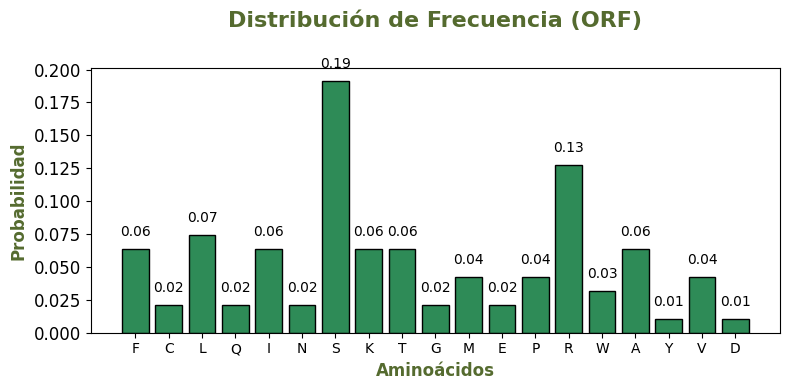

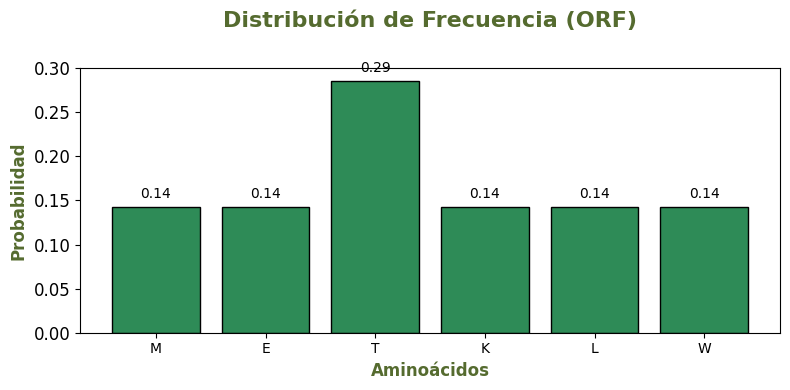

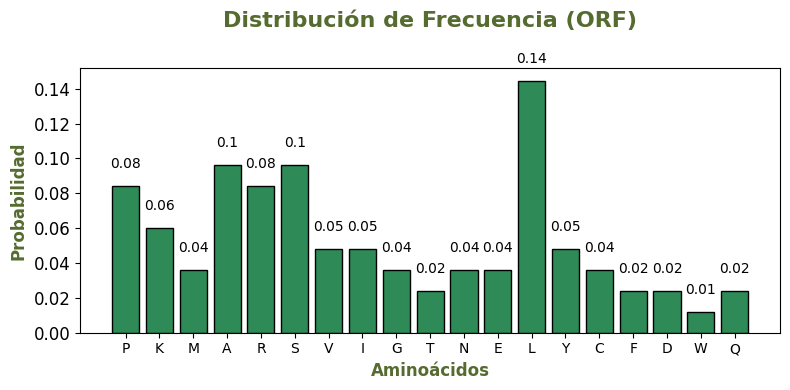

In [237]:
for i,ORF in enumerate(orfs):
  if len(ORF) != 0:
    for secuencia in ORF: #Calculamos las frecuencias para todas las secuencias de cada ORF
      distribucion_aminoacidos = frecuencia(secuencia)
      if i == 5:
            graficar_frecuencia(distribucion_aminoacidos, "ORF") #Pero graficamos solo para el ultimo marco (sino son muchos graficos)
  else:
    pass

ORFs_ = [sec for sublista in ORFs_a for sec in sublista]


## iv) En base a lo analizado previamente determine a partir del largo y la distribución una probabilidad de corresponder (o no) a una región codificante.

Lo que nos falta para poder detectar las regiones codificantes es el largo
de las proteinas naturales, ya que contamos con la distribucion de referencia de las globinas

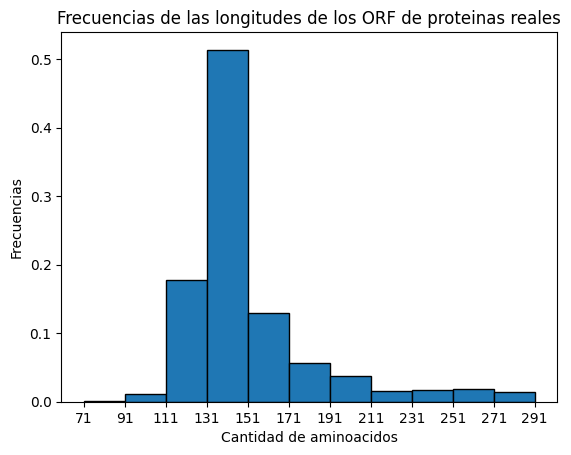

El largo promedio de las globinas es 270  y la mediana es 169
El promedio pesado es 149


In [278]:
largos = [len(globina) for globina in globinas]

#Graficamos la distribucion de los largos de los ORFs
conteos, bordes = np.histogram(largos, bins=np.arange(min(largos),300,20))
frecuencias_largos_ORFS_reales = [f/len([x for x in largos if x<300]) for f in conteos]
centros = 0.5 * (bordes[:-1] + bordes[1:])
anchos = np.diff(bordes)
centros_ = []
plt.bar(centros, frecuencias_largos_ORFS_reales, width=anchos, align='center', edgecolor='black')
plt.xlabel("Cantidad de aminoacidos")
plt.xticks(ticks = np.arange(min(largos),300,20))
plt.ylabel("Frecuencias")
plt.title("Frecuencias de las longitudes de los ORF de proteinas reales")
plt.show()

print(f"El largo promedio de las globinas es {int(np.average(largos))}  y la mediana es {int(np.median(largos))}")
promedio_pesado = np.sum(centros * frecuencias_largos_ORFS_reales)
print(f"El promedio pesado es {int(promedio_pesado)}")

Como podemos observar aqui arriba, el promedio de los largos es 270, pero claramente hay mas globinas con largo mucho menor. Por ello tomaremos como referencia el valor medio entre el promedio pesado de los rangos del histograma y la mediana, que es **160**.

#Lo que haremos para detectar regiones codificantes es:
Dada una secuencia de adn:

 La traducimos en sus 6 marcos abiertos de lectura

Para cada marco abierto de lectura:

 Obtenemos las secuencias entre codones stop

Si en una de estas secuencias hay mas de una metionina, elegimos la secuencia cuyo largo este mas cerca de 160.

Luego, tomamos el marco abierto de lectura cuya distribucion de aminoacidos de el menor error cuadratico medio respecto la distribucion de referencia.

Por ultimo, analizamos si dicho error esta por debajo del umbral (es region codificante) o no.

# Funcion que obtiene distribucion de aminoacidos y largos de ORFs dada una secuencia de ADN

In [ ]:
def detector_orfs(adn):
  orfs, largos_orfs = obtener_marcos_abiertos_lectura(adn)


#Control positivo

Es region codificante con probabilidad 0.9021147491592869 para el marco de lectura 4


#Control negativo

In [ ]:
random.seed(40)
tamanios = np.arange(10,500,10)
resultados = []
for s in tamanios: #Generamos controles negativos de distintos tamaños y probamos con todos, esperando que devuelva que no es codificante para cada una
    control_negativo = Seq(adn_azar(s*3))
    ORFs_n, largos_ORF_n = obtener_dist(control_negativo)
    control_negativo_resultado, marco = es_region_codificante(ORFs_n, largos_ORF_n)
    resultados.append(control_negativo_resultado)
fasta_path = "proteinas.fasta"

# Leer secuencias
secuencias = []
for record in SeqIO.parse(fasta_path, "fasta"):
    secuencias.append(str(record.seq))
acierto = (len(resultados) - sum(resultados))/ len(resultados)
print(f"Acertamos en {acierto} controles negativos ")

Acertamos en 0.3877551020408163 controles negativos 


¿Qué modificaciones podría agregar para mejorar su capacidad predictiva?

Observamos un porcentaje de aciertos de 38,7%. No es un buen detector de regiones codificantes, creemos que puede mejorar aumentando el numero y tipo de proteinas con las cuales tomamos las frecuencias de referencia (tanto para la distribucion de aminoacidos como para la de los largos de los ORFs).
Como hay 20 aminoacidos, obtener una distribucion precisa para cada uno requiere contar con mas proteinas.
Ademas usamos la misma metrica para proteinas de distinto tamaño, cuando podriamos obtener distintas distribuciones para distintos largos (intuimos que es logico a nivel biologico).

Obtenga de alguna base de datos de secuencias genómicas la secuencia de un gen eucariota completo
y corra su programa.

Usaremos el gen TP53 (tumor protein p53)

El gen tiene 25 regiones codificantes con 12 secuencias sin repetidos
Acertamos en un 100.0 por ciento de las  regiones codificantes 


Podemos concluir que nuestra funcion suele arrojar probabilidades altas, independientemente de si se trata de una proteina real o un una al azar.
Esto se puede deber a que no capta con precision las distribuciones de aminoacidos y largos de ORFs en proteinas reales, entonces las distribuciones que tomamos como referencia son similares a aquellas de secuencias al azar.
Es poco sensible a secuencias aleatorias, podriamos definir numerosas secuencias al azar, obtener una distribucion promedio de ellas y en la funcion es_region_codificante penalizar la probabilidad si la secuencia a comparar tiene distribuciones similares a la aleatoria promedio.  